In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd

In [6]:
import seaborn as sns

In [7]:
import matplotlib.pyplot as plt

In [8]:
import numpy as np

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

In [10]:
# Load the Dataset
df = pd.read_csv("Data/sample_results_dataset1.csv")
df.head()

,ReferenceNumber,SAT,GCSE,GCE AS,GCE A
0,1,127,6,B,A
1,2,121,5,A,B
2,3,111,6,B,C
3,4,102,7,A,A*
4,5,118,5,D,B


In [11]:
# Mapping for A-level grades
a_level_points = {
    "A*": 60,
    "A": 50,
    "B": 40,
    "C": 30,
    "D": 20,
    "E": 10,
    "U": 0
}

# Add numeric A-level value column
df["GCE_A_Value"] = df["GCE A"].map(a_level_points)

In [12]:
# Mapping for AS-level grades
as_level_points = {
    "A": 25,
    "B": 20,
    "C": 15,
    "D": 10,
    "E": 5,
    "U": 0
}

# Add numeric AS-level value column
df["GCE_AS_Value"] = df["GCE AS"].map(as_level_points)

In [13]:
# Add constant average columns
#df["SATAverage"] = 110
#df["GCSEAverage"] = 5.1
#df["GCE_AS_Average"] = 15
#df["GCE_A_Average"] = 40


In [ ]:
#Standardize the Data
df[[""SATStan"", "GCE_A_ValueStan", "GCE_AS_ValueStan"
    ,"GCSEStan"]] = StandardScaler().fit_transform(df[["SAT", "GCE_A_Value", "GCE_AS_Value"
                                                        ,"GCSE"]])
df.head()

,ReferenceNumber,SAT,GCSE,GCE AS,GCE A,GCE_A_Value,GCE_AS_Value,GCE_A_ValueStan,GCSEStan
0,1,127,6,B,A,50,20,0.677878,0.599817
1,2,121,5,A,B,40,25,-0.050240,-0.074893
2,3,111,6,B,C,30,20,-0.778358,0.599817
3,4,102,7,A,A*,60,25,1.405995,1.274526
4,5,118,5,D,B,40,10,-0.050240,-0.074893


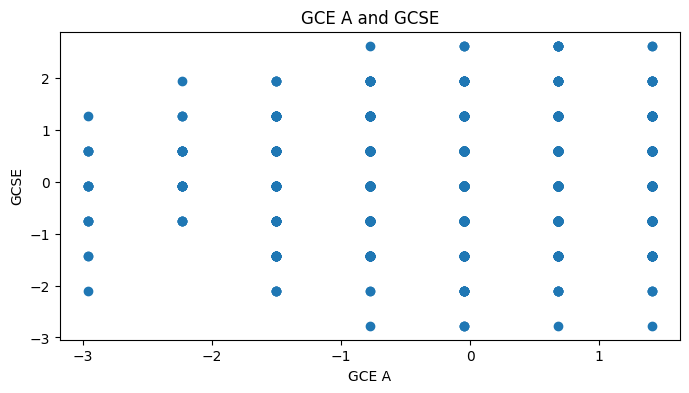

In [15]:
#Visualise A levels(AnnualIncome) and Average Score (Spending Score)
plt.figure(figsize=(8,4))

plt.scatter(df["GCE_A_ValueStan"],df["GCSEStan"])
plt.title("GCE A and GCSE")
plt.xlabel("GCE A")
plt.ylabel("GCSE")
plt.show()

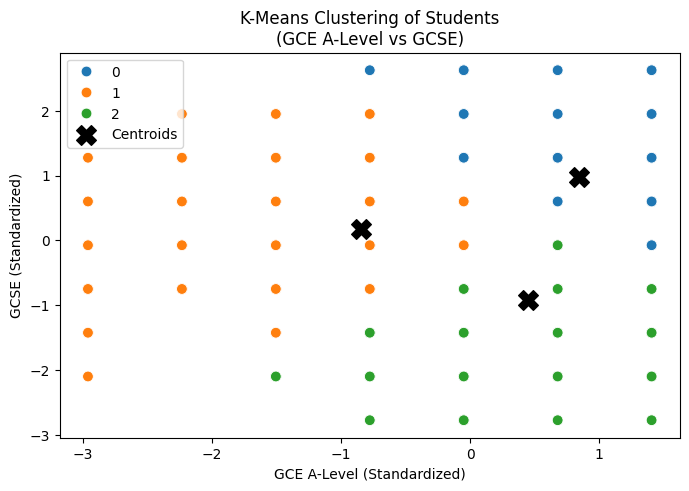

In [16]:
# Fit final KMeans model using your chosen K
optimal_k = 3   # <-- change this to the K you select from elbow/silhouette
kmeans = KMeans(
    n_clusters=optimal_k,
    init="k-means++",
    n_init="auto",
    random_state=0
)

kmeans.fit(df[["GCE_A_ValueStan", "GCSEStan"]])
df["Cluster"] = kmeans.labels_

# Plot clusters
plt.figure(figsize=(8, 5))

sns.scatterplot(
    data=df,
    x="GCE_A_ValueStan",
    y="GCSEStan",
    hue="Cluster",
    palette="tab10",
    s=60
)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=200,
    c="black",
    marker="X",
    label="Centroids"
)

plt.title("K-Means Clustering of Students\n(GCE A-Level vs GCSE)")
plt.xlabel("GCE A-Level (Standardized)")
plt.ylabel("GCSE (Standardized)")
plt.legend()
plt.show()


In [17]:
# Find the optimal K VAlue
# Using the Silhouette Score & Variance Elbow Plot
# hides any warning you might get abou "memory leak"
import warnings
warnings.filterwarnings('ignore')

In [18]:
TotVar = []
Silhouette = []

In [19]:
# Start and End Points of K Values
#number of clusters from 2-15
StartK = 2
EndK = 15


In [20]:
# Loop to calculate variance & silhouette score by K cluster
for K in range(StartK, EndK):
    kmeans = KMeans(
        n_clusters=K,
        init="k-means++",
        n_init="auto",
        random_state=0
    )
    
    kmeans.fit(df[["GCE_A_ValueStan", "GCSEStan"]])
    labels = kmeans.labels_
    
    Silhouette.append(silhouette_score(df[["GCE_A_ValueStan", "GCSEStan"]], labels))
    TotVar.append(kmeans.inertia_)


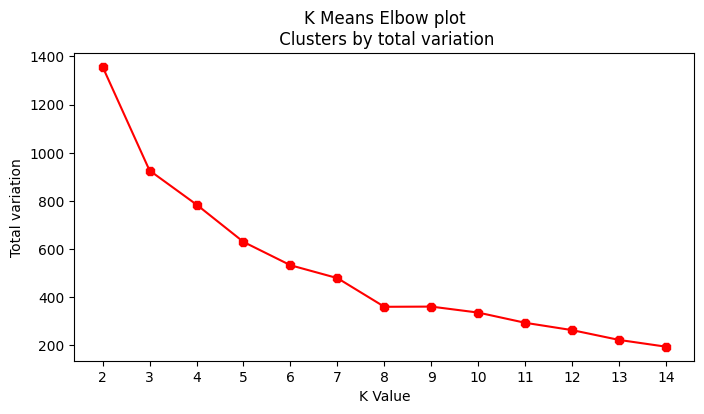

In [21]:
#Plot Loop Results: Elbow plot
plt.figure(figsize=(8,4))

plt.plot(range(StartK, EndK), TotVar, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(StartK, EndK,1))
plt.ylabel("Total variation")
plt.title("K Means Elbow plot\n Clusters by total variation")
plt.show()

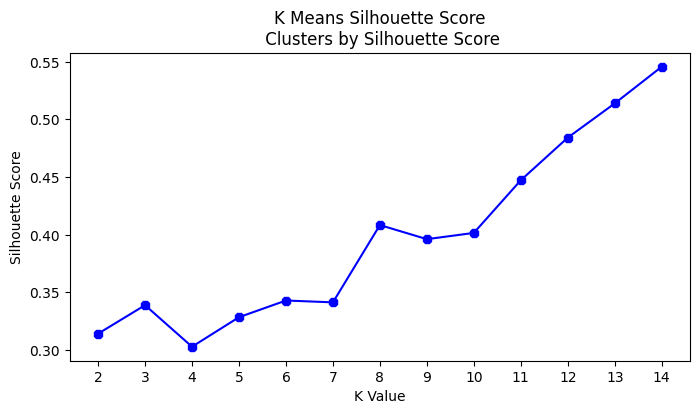

In [22]:
#Plot Loop Results: Silhouette score plot
plt.figure(figsize=(8,4))

plt.plot(range(StartK, EndK), Silhouette, color="blue", marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(StartK, EndK,1))
plt.ylabel("Silhouette Score")
plt.title("K Means Silhouette Score\n Clusters by Silhouette Score")
plt.show()

In [23]:
#table format for Loop Results
LoopResults = pd.DataFrame(np.arange(StartK, EndK,1), columns= ["K Value"])
LoopResults["Total Variation"] = TotVar
LoopResults["silhouette score"] = Silhouette
print(LoopResults)


    K Value  Total Variation  silhouette score
0         2      1357.145937          0.314078
1         3       925.951083          0.338798
2         4       784.330697          0.302770
3         5       629.180796          0.328383
4         6       532.372327          0.342856
5         7       478.828043          0.341262
6         8       359.695151          0.408315
7         9       360.492077          0.396070
8        10       335.575227          0.401498
9        11       293.145258          0.447186
10       12       262.669041          0.484128
11       13       221.933914          0.513847
12       14       193.818611          0.545659


In [24]:
#Create the Final K-Means using K=8
#n_cluster No of clusters to use
#init initialisation method, we will use k-means++
#n_init the no of times the algorithm is run with diff centroids, (ususally Auto)
kmeans = KMeans(n_clusters= 8, init= "k-means++", n_init= "auto", random_state= 0)

kmeans.fit(df[["GCE_A_ValueStan", "GCSEStan"]])

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",8
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",0
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [25]:
#Create the Clusters andAdd the Clusters to the Dataset
df["Clusters"] = kmeans.fit_predict(df[["GCE_A_ValueStan", "GCSEStan"]])
df.head()

,ReferenceNumber,SAT,GCSE,GCE AS,GCE A,GCE_A_Value,GCE_AS_Value,GCE_A_ValueStan,GCSEStan,Cluster,Clusters
0,1,127,6,B,A,50,20,0.677878,0.599817,0,0
1,2,121,5,A,B,40,25,-0.050240,-0.074893,1,5
2,3,111,6,B,C,30,20,-0.778358,0.599817,1,1
3,4,102,7,A,A*,60,25,1.405995,1.274526,0,0
4,5,118,5,D,B,40,10,-0.050240,-0.074893,1,5


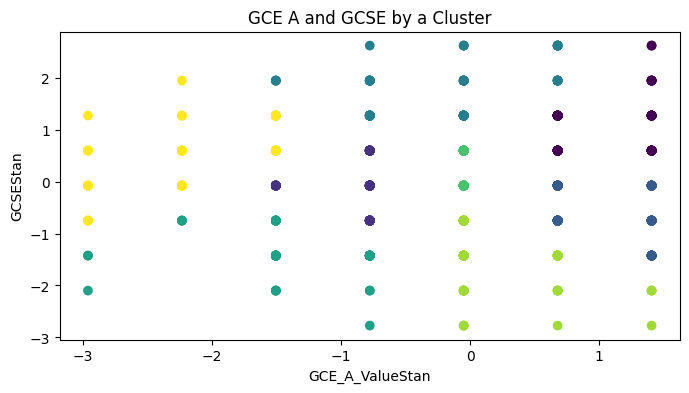

In [ ]:
# Visualise the 8 Clusters with GCE A and GCSE
plt.figure(figsize=(8,4))

plt.scatter(df["GCE_A_ValueStan"],df["GCSEStan"],c=df["Cluster"])
plt.title("GCE A and GCSE by a Cluster")
plt.xlabel("GCE_A_ValueStan")
plt.ylabel("GCSEStan")
plt.show()

In [27]:
#fig, ax1 = plt.subplots(figsize=(8,4))
#ax2 = ax1.twinx()

In [28]:
#ax1.plot(range(StartK, EndK),Silhouette,color = "blue"
#         ,marker = "8", label="Silhouette")
#ax2.plot(range(StartK, EndK),TotVar,color = "red"
#         ,marker = "8", label="Elbow Plot")

In [29]:
#ax1.set_ylabel("Silhouette Score", colour = "Blue")
#ax2.set_ylabel("Elbow Plot", colour = "Red")
#fig.suptitle("Silhouette Score & Elbow Plot by K")
#fig.legend(loc="upper left")
#ax1.set_xticks(np.arange(StartK,EndK, 1))
#plt.show()